In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df=pd.read_csv(r'C:/Users/Arzu/Downloads/train.csv')
null_cols = []
for col in df.columns:
    if df[col].isnull().sum() > 0 :
        print("Column",col, "has", df[col].isnull().sum(),"null values")    
        null_cols.append(col)


df=df.drop(columns=['MSZoning',  'Street','Alley',
        'LotShape', 'LandContour',  'LotConfig',
       'LandSlope',  'Condition1', 'Condition2', 'BldgType',
       'HouseStyle',  'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2',  
       'HeatingQC', 'CentralAir', 'Electrical', 
       'LowQualFinSF',  'BsmtFullBath',  'FullBath',
       'HalfBath', 'KitchenQual',
       'TotRmsAbvGrd',  'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold',
       'SaleCondition','Functional'])
#drop columns with most of the null values(MSZoning,Alley,PoolQC,Fence,MiscFeature)
#'MSSubClass', 'LotFrontage', 'LotArea', 'Utilities','Neighborhood', 'OverallQual', 'OverallCond', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'BedroomAbvGr','KitchenAbvGr', 'GarageArea', 'MiscVal', 'YrSold', 'SaleType','SalePrice'
# are the columns mostly numerical ones can help more to predict prices

Column LotFrontage has 259 null values
Column Alley has 1369 null values
Column MasVnrType has 8 null values
Column MasVnrArea has 8 null values
Column BsmtQual has 37 null values
Column BsmtCond has 37 null values
Column BsmtExposure has 38 null values
Column BsmtFinType1 has 37 null values
Column BsmtFinType2 has 38 null values
Column Electrical has 1 null values
Column FireplaceQu has 690 null values
Column GarageType has 81 null values
Column GarageYrBlt has 81 null values
Column GarageFinish has 81 null values
Column GarageQual has 81 null values
Column GarageCond has 81 null values
Column PoolQC has 1453 null values
Column Fence has 1179 null values
Column MiscFeature has 1406 null values


# a) EDA

In [146]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Utilities,Neighborhood,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,...,2ndFlrSF,GrLivArea,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,MiscVal,YrSold,SaleType,SalePrice
0,1,60,65.0,8450,AllPub,CollgCr,7,5,196.0,706,...,854,1710,0,3,1,548,0,2008,WD,208500
1,2,20,80.0,9600,AllPub,Veenker,6,8,0.0,978,...,0,1262,1,3,1,460,0,2007,WD,181500
2,3,60,68.0,11250,AllPub,CollgCr,7,5,162.0,486,...,866,1786,0,3,1,608,0,2008,WD,223500
3,4,70,60.0,9550,AllPub,Crawfor,7,5,0.0,216,...,756,1717,0,3,1,642,0,2006,WD,140000
4,5,60,84.0,14260,AllPub,NoRidge,8,5,350.0,655,...,1053,2198,0,4,1,836,0,2008,WD,250000


In [147]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Utilities',
       'Neighborhood', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageArea', 'MiscVal', 'YrSold', 'SaleType',
       'SalePrice'],
      dtype='object')

In [148]:
df.isnull().sum()

Id                0
MSSubClass        0
LotFrontage     259
LotArea           0
Utilities         0
Neighborhood      0
OverallQual       0
OverallCond       0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtHalfBath      0
BedroomAbvGr      0
KitchenAbvGr      0
GarageArea        0
MiscVal           0
YrSold            0
SaleType          0
SalePrice         0
dtype: int64

In [149]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Utilities     1460 non-null   object 
 5   Neighborhood  1460 non-null   object 
 6   OverallQual   1460 non-null   int64  
 7   OverallCond   1460 non-null   int64  
 8   MasVnrArea    1452 non-null   float64
 9   BsmtFinSF1    1460 non-null   int64  
 10  BsmtFinSF2    1460 non-null   int64  
 11  BsmtUnfSF     1460 non-null   int64  
 12  TotalBsmtSF   1460 non-null   int64  
 13  Heating       1460 non-null   object 
 14  1stFlrSF      1460 non-null   int64  
 15  2ndFlrSF      1460 non-null   int64  
 16  GrLivArea     1460 non-null   int64  
 17  BsmtHalfBath  1460 non-null   int64  
 18  BedroomAbvGr  1460 non-null 

In [151]:
df.dtypes

Id                int64
MSSubClass        int64
LotFrontage     float64
LotArea           int64
Utilities        object
Neighborhood     object
OverallQual       int64
OverallCond       int64
MasVnrArea      float64
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
1stFlrSF          int64
2ndFlrSF          int64
GrLivArea         int64
BsmtHalfBath      int64
BedroomAbvGr      int64
KitchenAbvGr      int64
GarageArea        int64
MiscVal           int64
YrSold            int64
SaleType         object
SalePrice         int64
dtype: object

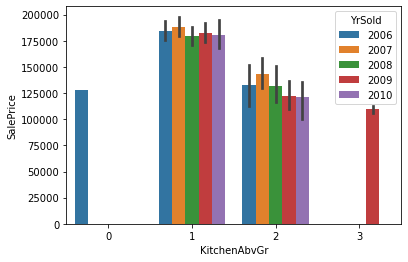

In [152]:
sns.barplot(x='KitchenAbvGr',y="SalePrice",hue='YrSold',data=df)

In [153]:
#House prices between 2006-2010 regarding number of kitchens

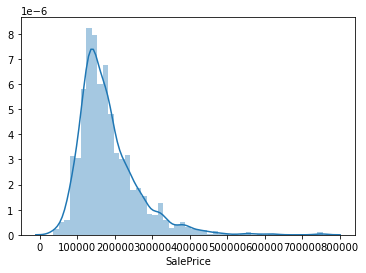

In [154]:
sns.distplot(df['SalePrice'])

In [155]:
#The 'SalePrice' is dense between 100k and 250k, but there are larger outliers on the right side,the expensive price range

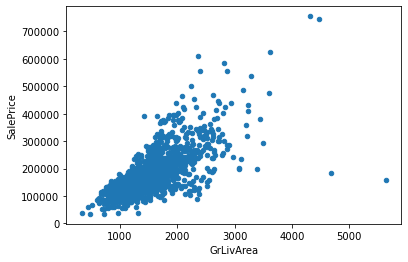

In [156]:
df.plot.scatter(x='GrLivArea',y='SalePrice')

In [157]:
#It is generally expected that larger living area comes with higher price. This chart shows thats generally true. But there are some 2–3 “cheap” houses with large living area 

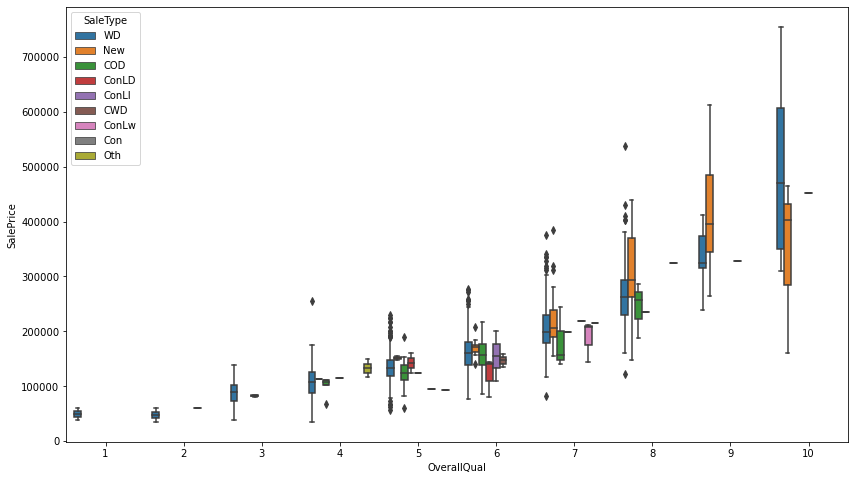

In [158]:
f, ax = plt.subplots(figsize=(14, 8))
fig=sns.boxplot(x='OverallQual',y='SalePrice',hue='SaleType',data=df)

In [159]:
#From the boxplot above when overal quality is high saleprice is also high but for different sale types it depends

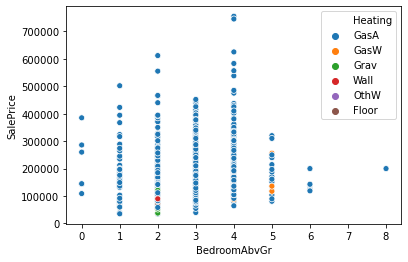

In [160]:
sns.scatterplot(x='BedroomAbvGr',y='SalePrice',hue='Heating',data=df)

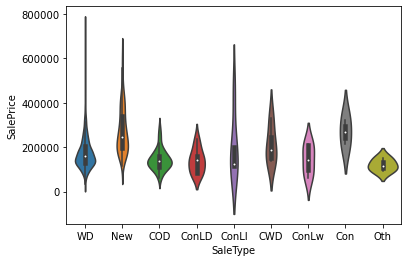

In [161]:
sns.violinplot(x='SaleType',y='SalePrice',data=df)

# b,c,d)GridSearchCV

In [162]:
X=df[['MSSubClass', 'LotFrontage', 'LotArea', 'Utilities',
       'Neighborhood', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageArea', 'MiscVal','YrSold','SaleType']]
y=df['SalePrice']


In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

In [164]:
numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore'))
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, [ 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageArea', 'MiscVal','YrSold']),
    ('categorical', categorical_transformer, [ 'Heating', 'Utilities', 'Neighborhood','SaleType'])
])

model=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regressor', KNeighborsRegressor())
])

In [210]:

param_space={
    'regressor__n_neighbors':range(5,57,2)
}

In [211]:
gridsearch=GridSearchCV(model,param_space,cv=5)

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [214]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                      

In [215]:
from math import sqrt

mse = mean_squared_error(y_test,gridsearch.best_estimator_.predict(X_test))
print(mse)

1263954659.315542


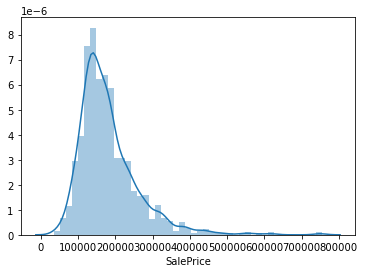

In [216]:
sns.distplot(y_train)

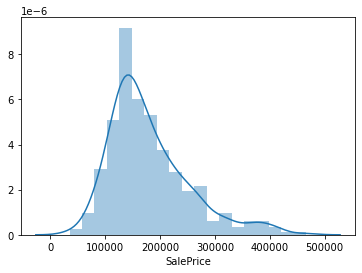

In [217]:
sns.distplot(y_test)

In [218]:
gridsearch.predict(X_test)

test_predictions = gridsearch.predict(X_test)
test_predictions


array([234738.22222222, 128000.        , 317116.22222222, 137250.22222222,
       174341.66666667, 135211.11111111, 305055.55555556, 350801.11111111,
       247208.        , 265365.55555556, 191883.33333333, 186377.77777778,
       148077.77777778, 108470.33333333, 168794.66666667, 281906.22222222,
       167377.77777778, 209294.44444444, 221583.33333333, 159455.55555556,
       182155.22222222, 168600.        , 227890.33333333, 205255.55555556,
       128100.        , 124333.33333333, 134977.77777778, 151661.11111111,
       297222.22222222, 137973.33333333, 165861.11111111, 131161.11111111,
       127461.11111111, 195333.33333333, 282751.11111111, 149977.77777778,
       176634.11111111, 155344.44444444,  90433.33333333, 126772.55555556,
       214244.44444444, 106611.11111111, 226833.33333333, 187005.55555556,
       247166.66666667, 205988.88888889, 143816.66666667, 136619.44444444,
       112334.22222222, 137900.        , 153700.        , 137600.        ,
       177219.11111111, 1

(array([ 55., 153.,  90.,  33.,  23.,   9.,   1.,   0.,   0.,   1.]),
 array([ 74388.88888889, 123434.97777778, 172481.06666667, 221527.15555556,
        270573.24444444, 319619.33333333, 368665.42222222, 417711.51111111,
        466757.6       , 515803.68888889, 564849.77777778]),
 <a list of 10 Patch objects>)

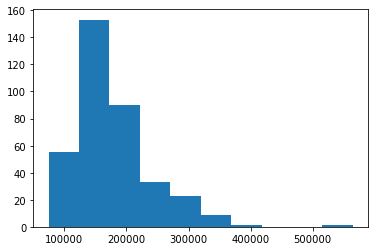

In [219]:
#f
plt.hist(test_predictions)

In [220]:
gridsearch.best_score_

0.7552276586075649

In [221]:
gridsearch.score(X_train,y_train)

0.8228198439119698

In [222]:
gridsearch.score(X_test,y_test)


0.7644372031499718

#g

score is getting better while we optimize the model.From the f) plot we can see how price is changing in a period

In [232]:
# h) Feature Engineering

In [224]:
from sklearn.preprocessing import PolynomialFeatures

In [225]:
model=Pipeline(steps=[
    ('preprocessing', column_transformer),
     ('polynomial_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', KNeighborsRegressor())
])

In [226]:
gridsearch = GridSearchCV(model, param_space, cv=5)
gridsearch.fit(X_train, y_train)
gridsearch.score(X_test,y_test)

0.7384845273786445

In [227]:
gridsearch.best_score_

0.7305026378684518

In [228]:
gridsearch.best_params_

{'regressor__n_neighbors': 9}

In [229]:
NumStr = ["MSSubClass","BsmtHalfBath","BedroomAbvGr","KitchenAbvGr","YrSold"]
for col in NumStr:
    df[col]=df[col].astype(str)

In [230]:
df.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])

SalePrice              
                     mean  median count
MSSubClass                             
120         200779.080460  192000    87
160         138647.380952  146000    63
180         102300.000000   88500    10
190         129613.333333  128250    30
20          185224.811567  159250   536
30           95829.724638   99900    69
40          156125.000000  142500     4
45          108591.666667  107500    12
50          143302.972222  132000   144
60          239948.501672  215200   299
70          166772.416667  156000    60
75          192437.500000  163500    16
80          169736.551724  166500    58
85          147810.000000  140750    20
90          133541.076923  135980    52

In [231]:
df["oMSSubClass"] = df.MSSubClass.map({'180':1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})
    
df["oHeating"] = df.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
    
    
    
df["oSaleType"] = df.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})